In [1]:
# Import libraries.
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import time
import random
from IPython.display import clear_output

%matplotlib inline

In [4]:
class Graphics():
    
    def __init__(self):
        print("Graphics module ready!")
        
    def render(self,x_fin,y_fin, x, y, environment, plot_values = True):
            
        fig1 = plt.figure(figsize=(4, 4))
        ax1 = fig1.add_subplot(111, aspect='equal')

        # Horizontal lines.
        for i in range(0, 6):
            ax1.axhline(i * 0.2, linewidth=2, color="#2D2D33")
            ax1.axvline(i * 0.2, linewidth=2, color="#2D2D33")

        # Salida, Meta & GameOver.
        # Salida (amarillos)
        ax1.add_patch(patches.Rectangle((0.0, 0.0), 0.2, 0.2, facecolor = "#F6D924"))
        
        ax1.add_patch(patches.Rectangle((0.2, 0.8), 0.2, 0.2, facecolor = "#F6D924"))
        ax1.add_patch(patches.Rectangle((0.8, 0.2), 0.2, 0.2, facecolor = "#F6D924"))
        
        # Meta (verde)
        ax1.add_patch(patches.Rectangle((x_fin,y_fin), 0.2, 0.2, facecolor = "#68FF33"))
        #ax1.add_patch(patches.Rectangle((0.8, 0.8), 0.2, 0.2, facecolor = "#FF5533"))
        
        # Muros del juego.
        array=[[0.8, 0.6],[0.2, 0.4],[0.6, 0.2],[0.2, 0.0],[0.4, 0.8],[0.8, 0.4]]
        while len(array)!=0:
            var2 = array.pop(0)
            x_ = var2[0]
            y_ = var2[1]
            ax1.add_patch(patches.Rectangle((x_,y_), 0.2, 0.2, facecolor = "#33A4FF"))
        #ax1.add_patch(patches.Rectangle((0.6, 0.2), 0.2, 0.2, facecolor = "#33A4FF"))
        #ax1.add_patch(patches.Rectangle((0.2, 0.0), 0.2, 0.2, facecolor = "#33A4FF"))
        
        #ax1.add_patch(patches.Rectangle((0.4, 0.8), 0.2, 0.2, facecolor = "#33A4FF"))
        #ax1.add_patch(patches.Rectangle((0.4, 0.8), 0.2, 0.2, facecolor = "#33A4FF"))
        #ax1.add_patch(patches.Rectangle((0.8, 0.4), 0.2, 0.2, facecolor = "#33A4FF"))
        
        # Limit grid view.
        plt.ylim((0, 1))
        plt.xlim((0, 1))

        # Plot player.
        plt.scatter(x, y, s = 100, color = "black", marker = "o", facecolor = "blue", edgecolors = "blue", zorder = 10)

        # Plot state values.
        if plot_values:
            for i in range(0, len(environment.value_state_table)):
                for j in range(0, len(environment.value_state_table[0])):
                    plt.text(environment.grid_pos[i] - 0.08, environment.grid_pos[j] - 0.03, 
                             round(environment.value_state_table[i][j], 1), fontsize=16)
                
        # Plot grid.
        plt.axis("off")
        plt.show()  

In [5]:
class GridEnvironment():
    
    def __init__(self, fin_x, fin_y):
        self.fin_x = fin_x
        self.fin_y = fin_y
        # RECOMPENSA
        self.rw = -1 # Living (Movement) Penalty
        # INICIALIZACION
        self.walls_and_paths = [[1, 1, 1, 1, 1], [0, 1, 0, 0, 1], [1, 1, 1, 1, 0], [1, 0, 1, 1, 1], [1, 1, 0, 1, 1]]
        self.rewards = [[self.rw, self.rw, self.rw, self.rw, self.rw], 
                        [self.rw, self.rw, self.rw, self.rw, self.rw], 
                        [self.rw, self.rw, self.rw, self.rw, self.rw], 
                        [self.rw, self.rw, self.rw, self.rw, self.rw], 
                        [self.rw, self.rw, self.rw, self.rw, self.rw]]
        self.grid_pos = [0.1, 0.3, 0.5, 0.7, 0.9]
        # Cambiar el valor
        self.value_state_table = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
        self.value_state_table[fin_x][fin_y]=100
    
    def getStateValue(self, position):
        return self.value_state_table[position[0]][position[1]]
    
    def reset(self, fin_x, fin_y):
        self.value_state_table = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
        self.value_state_table[fin_x][fin_y]=100

In [6]:
x_fin=0
y_fin=0
[0.8, 0.4]
while (x_fin==0 and y_fin==0) or (x_fin==1 and y_fin==4) or (x_fin==4 and y_fin==1) or (x_fin==4 and y_fin==3) or (x_fin==1 and y_fin==2) or(x_fin==3 and y_fin==1) or(x_fin==1 and y_fin==0) or(x_fin==2 and y_fin==4) or(x_fin==4 and y_fin==2):
    x_fin=random.randint(1, 5)-1
    y_fin=random.randint(1, 5)-1
    print("x ", x_fin)
    print("y ",y_fin)

print("x final: ",x_fin)
print("y final: ",y_fin)

x  3
y  1
x  4
y  2
x  4
y  3
x  2
y  4
x  0
y  4
x final:  0
y final:  4


Graphics module ready!


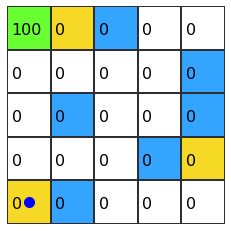

In [7]:
environment = GridEnvironment(x_fin,y_fin)
graph = Graphics()
graph.render(x_fin*0.2,y_fin*0.2, 0.1, 0.1, environment)

In [8]:
class valueBasedAgent():
    
    def __init__(self, environment, policy, discount_factor):
        self.pos = [0,0]
        self.total_reward = 0
        self.environment = environment
        self.discount_factor = discount_factor
        self.actions = ["up", "down", "left", "right"]
        
        # Start with a random policy. 0.25 chance of moving to any direction.
        self.policy = policy   
            
    def forwardState(self, pos, action):
        
        # New position array.
        new_position = pos
        
        # Compute new position based on action taken.
        if(action == "up" and pos[1] < 4):
            if(self.environment.walls_and_paths[pos[0]][pos[1] + 1]) == 1:
                new_position = [pos[0], pos[1] + 1]

        elif(action == "down" and pos[1] > 0):
            if(self.environment.walls_and_paths[pos[0]][pos[1] - 1]) == 1:
                new_position = [pos[0], pos[1] - 1]
                
        elif(action == "left" and pos[0] > 0):
            if(self.environment.walls_and_paths[pos[0] - 1][pos[1]]) == 1:
                new_position = [pos[0] - 1, pos[1]]

        elif(action == "right" and pos[0] < 4):
            if(self.environment.walls_and_paths[pos[0] + 1][pos[1]]) == 1:
                new_position = [pos[0] + 1, pos[1]]
        return new_position
        
        
    def valueFunction(self):
            
        # Initialize variable.
        new_state_value = 0
    
        # Random movement! - Cuando aun no se ha inicializado 
        if self.policy[self.pos[0]][self.pos[1]] == "r":
            for action in self.actions:        
                forward_state = self.forwardState(self.pos, action)
                
                # Simplified version of Q-value. BELLMANS EQUATION
                q_value = (self.environment.rewards[forward_state[0]][forward_state[1]] 
                                    + self.discount_factor * self.environment.value_state_table[forward_state[0]][forward_state[1]])
                new_state_value += q_value * 0.25 # Probabilidad de 0.25 para cada una de las acciones
            return new_state_value
        
        # Not random movement!
        else: 
            action = self.policy[self.pos[0]][self.pos[1]]
            forward_state = self.forwardState(self.pos, action)
            
            # Simplified version of Q-value.
            q_value = (self.environment.rewards[forward_state[0]][forward_state[1]] 
                                    + self.discount_factor * self.environment.value_state_table[forward_state[0]][forward_state[1]])
            new_state_value += q_value # Probabilidad de 1
            return new_state_value
        
    def getPosition(self):
        return self.pos
    
    def getReward(self):
        return self.total_reward
    
    def setPosition(self, x, y):
        self.pos = [x, y]
        
    def updateValueStateTable(self):
        new_state_value = self.valueFunction()
        self.environment.value_state_table[self.pos[0]][self.pos[1]] = new_state_value
        
    def selectBestAction(self):
        
        # Compute new possible states.
        go_up = self.forwardState(self.pos, "up")
        go_down = self.forwardState(self.pos, "down")
        go_left = self.forwardState(self.pos, "left")
        go_right = self.forwardState(self.pos, "right")
        
        # Q values (simplified version).
        up_value = (self.environment.rewards[go_up[0]][go_up[1]] + 
                    self.discount_factor * self.environment.value_state_table[go_up[0]][go_up[1]])
        down_value = (self.environment.rewards[go_down[0]][go_down[1]] + 
                      self.discount_factor * self.environment.value_state_table[go_down[0]][go_down[1]])
        left_value = (self.environment.rewards[go_left[0]][go_left[1]] + 
                        self.discount_factor * self.environment.value_state_table[go_left[0]][go_left[1]])
        right_value = (self.environment.rewards[go_right[0]][go_right[1]] + 
                       self.discount_factor * self.environment.value_state_table[go_right[0]][go_right[1]])
        
        # Array of Q-values.
        values = [up_value, down_value, left_value, right_value]
        
        best_action = self.actions[values.index(max(values))] 
        return best_action       
            
    def move(self):
    
        # Select action according to policy.
        action = self.policy[self.pos[0]][self.pos[1]]
        print("Action taken", action)

        # Move to new position according to action taken.
        self.pos = self.forwardState(self.pos, action)
        print("New Position: ", self.pos)

In [9]:
class PolicyEvaluation(Graphics):
    
    def __init__(self,x_fin,y_fin, environment, agent, iterations = 3):
        
        self.x_fin = x_fin
        self.y_fin = y_fin
        self.environment = environment       
        self.agent = agent                     
        #print("GridWorld Initialize!")
        self.iterations = iterations
    
    def evaluate(self, plot_grid = True):
        self.DP_policy_evaluation(self.iterations, plot_grid)
        
    def DP_policy_evaluation(self, iterations, plot_grid):
        
        for k in range(0, iterations):
            for i in range(0, len(self.environment.value_state_table)):
                for j in range(0, len(self.environment.value_state_table[0])):

                    if self.environment.walls_and_paths[i][j] == 1 and self.canChangeStateValue(i, j):

                        # Set agent position.
                        self.agent.setPosition(i, j)
                        self.agent.updateValueStateTable()

                        # Method of the super class.
                        if(plot_grid):
                            
                            # Render game.
                            pos = self.agent.getPosition()
                            grid_coords = self.environment.grid_pos
                            
                            self.render(grid_coords[pos[0]], grid_coords[pos[1]], self.environment, True)
                            time.sleep(0.01)
                            clear_output(wait = True)
                            
    

    def canChangeStateValue(self, x, y):
        # Posicion que no se puede modificar
        cant_modify = bool((x == self.x_fin and y == self.y_fin)) # or (x == 4 and y == 4))
        
        grid = self.environment.walls_and_paths
        coords = list()
        
        # Get walls.
        for i in range(0, len(grid)):
            for j in range(0, len(grid[0])):
                if grid[i][j] == 0:
                    coords.append([i, j])
        for c in coords: 
            if c == [x, y]:
                cant_modify = True
                break
                
        return not cant_modify
    
    def updatePolicy(self):
        
         for i in range(0, len(self.environment.value_state_table)):
                for j in range(0, len(self.environment.value_state_table[0])):
                    if self.environment.walls_and_paths[i][j] == 1:
                        
                        # Set agent position.
                        self.agent.setPosition(i, j)
                        best_action = self.agent.selectBestAction()
                        self.agent.policy[i][j] = best_action

In [10]:
class Game(Graphics):
    
    def __init__(self,x_fin,y_fin, environment, agent):
        
        self.environment = environment       
        self.agent = agent             
        print("GridWorld Initialize!")
                
    def update(self, secs):
        
        pos = self.agent.getPosition()
        grid_coords = self.environment.grid_pos
        self.render(x_fin*0.2,y_fin*0.2, grid_coords[pos[0]], grid_coords[pos[1]], self.environment, False)
        time.sleep(1)
        clear_output(wait = True)
        # (self.agent.pos[0] == 4 and self.agent.pos[1] == 3)
        while not ((self.agent.pos[0] == x_fin and self.agent.pos[1] == y_fin)):
            
            self.agent.move()
            pos = self.agent.getPosition()
            print(grid_coords[pos[0]], grid_coords[pos[1]])
            self.render(x_fin*0.2,y_fin*0.2, grid_coords[pos[0]], grid_coords[pos[1]], self.environment, False)
            
            time.sleep(secs)
            clear_output(wait = True)
            
        #self.render(grid_coords[pos[0]], grid_coords[pos[1]], self.environment, False)
        #time.sleep(secs)
        #print("Yuhuu, we won the game!")
        #clear_output(wait = True)

### 1. Policy Evaluation (Planning) for DP.

In [11]:
# Generate the random policy.
policy = list()
for i in range(0, 5):
    column = list()
    for j in range(0, 5):
        column.append("r")
    policy.append(column)

# Initialize environment and agent.
discount_factor = 1
environment = GridEnvironment(x_fin,y_fin)
agent = valueBasedAgent(environment, policy, discount_factor)

agent.policy

[['r', 'r', 'r', 'r', 'r'],
 ['r', 'r', 'r', 'r', 'r'],
 ['r', 'r', 'r', 'r', 'r'],
 ['r', 'r', 'r', 'r', 'r'],
 ['r', 'r', 'r', 'r', 'r']]

In [12]:
environment.value_state_table

[[0, 0, 0, 0, 100],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [13]:
# Initialize policy evaluation class.
policy_evaluation = PolicyEvaluation(x_fin,y_fin,environment, agent, iterations = 100)
policy_evaluation.evaluate(plot_grid = False)

policy_evaluation.updatePolicy()

In [14]:
# New agent policy after policy evaluation.
agent.policy

[['up', 'up', 'up', 'up', 'up'],
 ['r', 'left', 'r', 'r', 'left'],
 ['up', 'left', 'down', 'down', 'r'],
 ['left', 'r', 'left', 'down', 'down'],
 ['left', 'down', 'r', 'left', 'down']]

In [15]:
environment.value_state_table

[[-15.343990227427643,
  -12.779752395974478,
  21.29092352597624,
  58.765116545842005,
  100],
 [0, -41.34137065673502, 0, 0, 95.99999999996922],
 [-75.2782185795262,
  -67.38914703641099,
  -82.73368176752383,
  -89.36693047617209,
  0],
 [-81.5442818000637,
  0,
  -89.36693047617209,
  -93.96463686119768,
  -97.24147056314555],
 [-85.68928070682048,
  -87.75367007065563,
  0,
  -97.24147056314555,
  -98.55901473104177]]

#### Win the Game with the previous policy evaluation results.

Action taken left
New Position:  [0, 4]
0.1 0.9


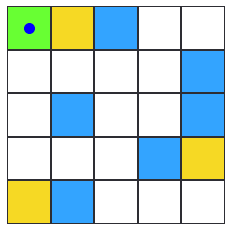

In [16]:
agent.pos = [1, 4]
game = Game(x_fin,y_fin, environment, agent)
game.update(0.1)

Action taken up
New Position:  [0, 4]
0.1 0.9


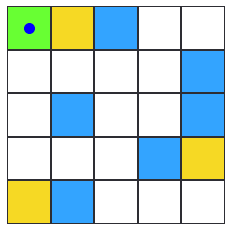

In [17]:
agent.pos = [4, 1]
game = Game(x_fin,y_fin,environment, agent)
game.update(0.1)

Action taken up
New Position:  [0, 4]
0.1 0.9


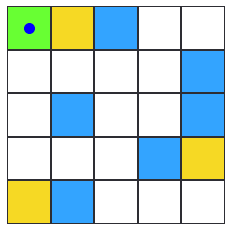

In [18]:
agent.pos = [0, 0]
game = Game(x_fin,y_fin,environment, agent)
game.update(0.1)

In [14]:
# Generate the random policy.
policy = list()
for i in range(0, 5):
    column = list()
    for j in range(0, 5):
        column.append("r")
    policy.append(column)
    
# Initaliza environment and agent.
discount_factor = 0.5
environment = GridEnvironment(x_fin,y_fin)
agent = valueBasedAgent(environment, policy, discount_factor)

# Policy iteration algorithm.
for i in range(0, 1000):

    # Reset value function.
    environment.reset(x_fin,y_fin)

    # Evaluate new policy.
    policy_evaluation = PolicyEvaluation(x_fin,y_fin, environment, agent, iterations = 10)
    policy_evaluation.evaluate(plot_grid = False)
    policy_evaluation.updatePolicy()

#### The optimal policy.

In [15]:
agent.policy

[['up', 'right', 'down', 'down', 'down'],
 ['r', 'right', 'r', 'r', 'left'],
 ['up', 'up', 'up', 'right', 'r'],
 ['left', 'r', 'up', 'up', 'right'],
 ['left', 'down', 'r', 'up', 'up']]

In [16]:
# Generate the random policy.
policy = list()
for i in range(0, 5):
    column = list()
    for j in range(0, 5):
        column.append("r")
    policy.append(column)
    
# Initaliza environment and agent.
discount_factor = 0.6
environment = GridEnvironment(x_fin,y_fin)
agent = valueBasedAgent(environment, policy, discount_factor)

# Policy iteration algorithm.
for i in range(0, 1000):

    # Reset value function.
    # environment.reset() => We do not reset the environment? 

    # Evaluate new policy.
    policy_evaluation = PolicyEvaluation(x_fin,y_fin,environment, agent, iterations = 1)
    policy_evaluation.evaluate(plot_grid = False)
    policy_evaluation.updatePolicy()

#### The optimal policy.

In [17]:
agent.policy

[['up', 'right', 'down', 'down', 'down'],
 ['r', 'right', 'r', 'r', 'left'],
 ['up', 'up', 'up', 'right', 'r'],
 ['left', 'r', 'up', 'up', 'right'],
 ['left', 'down', 'r', 'up', 'up']]